In [1]:
%pylab inline
import os

from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

def plot_image(matrix, cmap = cm.ocean, sizebar = True, text = '', colorbar = True, useAx = None, text_start_pos = 0.4):
    N = int(np.sqrt(len(matrix)))
    matrix = matrix.reshape([N, N])

    fig = figure(figsize=(4,4), dpi=128)
    if useAx == None:
        ax = fig.add_axes([0,0,1,1])
    else:
        ax = useAx
        ax.cla()
    
    ax.set_axis_off()
    im = ax.imshow(matrix, cmap=cmap, extent=(0,1380,0,1380))

    if colorbar:
        fig.colorbar(im)
        
    asb =  AnchoredSizeBar(ax.transData,
                             500,
                             '500 Mpc/$h$',
                             loc=4,
                             pad=0.1, borderpad=0.5, sep=10,
                             frameon=False, color = 'white', size_vertical = 10)

    fontsize = 20
    color = 'white'
    if color is not None:
        for r in asb.size_bar.findobj(Rectangle):
            r.set_edgecolor(color)
        for t in asb.txt_label.findobj(Text):
            t.set_color(color)
    if fontsize is not None:
        for t in asb.txt_label.findobj(Text):
            t.set_fontsize(fontsize)

    if sizebar:
        ax.add_artist(asb)
        
    if text != '':
        ax.text(text_start_pos, 0.9, text, color = 'white', fontsize = 15, transform = ax.transAxes)
  
    return ax, im


Populating the interactive namespace from numpy and matplotlib


In [2]:
folder = "build4/64_stand/"

In [3]:
class run:
    def __init__(self,folder):
        strIter = '0'
        c=0
        self.data_ps = np.loadtxt(folder+'/data_ps.txt', dtype = 'f8')
        self.k_bins = np.loadtxt('%sk_bins.txt' % folder)
        self.actual_ps = np.loadtxt('%sactual_ps.txt' % folder)
        self.delta_x = np.fromfile('%sdeltax2.dat' % folder, dtype='f8')
        try:
            self.gamma1 = np.fromfile('%sdata_gamma1.dat' % folder, dtype='f8')
            self.gamma2 = np.fromfile('%sdata_gamma2.dat' % folder, dtype='f8')
        except:
            next
        self.delta_ps = np.loadtxt('%sdelta_ps.txt' % folder)
        self.fiducial_ps = np.loadtxt('%sfiducial_ps.txt' % folder)
        self.sigma_noise = np.fromfile('%ssigmax2.dat' % folder, dtype='f8')
        self.mask = np.fromfile('%smask2.dat' % folder, dtype='f8')
        self.datax2 = np.fromfile('%sdatax2.dat' % folder, dtype='f8')
        self.delta_x_min = np.fromfile('%sdeltax2min.dat' % folder, dtype='f8')
        try:
            self.wfx = np.fromfile('%swfx2.dat' % folder, dtype='f8')
            self.wf_ps = np.loadtxt('%swf_ps.txt' % folder)
        except:
            print("No WF Data!")
        self.delta_min_ps = np.loadtxt('%sdelta_min_ps.txt' % folder)
        try:
            self.theta_est = np.loadtxt('%stheta_est_%s.txt' % (folder, strIter))
            self.theta_error = np.loadtxt('%stheta_error_%s.txt' % (folder, strIter))
        except:
            print("NO!")
        self.chi2 = np.loadtxt('%schi2.txt' % folder)
        try:
            self.bl = np.loadtxt('%sbl.txt' % folder)
            self.fisher = np.loadtxt('%sfisher.txt' % folder)
            self.signal = np.loadtxt('%ssignal.txt' % folder)

        except:
            print("No")
        self.bEst = np.loadtxt('%sb_est_%d.txt' % (folder, c))
        try:
            self.fisher_new_est = np.loadtxt('%sfisher_new_est_%d.txt' % (folder, c))
            ##
            off_diag = []

            for i in range(0,c+1,100):
                f = np.loadtxt('%sfisher_new_est_%d.txt' % (folder, i))
                off_diag.append([i,f[7, 8]])
            self.off_diag = np.array(off_diag)
            ##
            f_ratio = []
            print("T")
            it = c
            f_est_filename = folder+'fisher_est_' + str(it) + '.txt'
            f_est_current = np.loadtxt(f_est_filename)
        except:
            print("No fisher")
        try:
            self.window = np.loadtxt('%swindow.txt' % folder)
            f_ratio_current = np.diag(f_est_current) / np.diag(self.fisher)
            #f_ratio.append(np.average(np.abs(f_ratio_current - 1.)))
            f_ratio.append(np.abs(f_ratio_current[1] - 1.)) 
            print("F")
            self.f_ratio1 = f_ratio
        except:
            print("No")
        try:
            self.window_est = np.loadtxt('%swindow_est_%d.txt' % (folder, c))
        except:
            print("No window")
        try:
            for c in range(0,1000):
                try:
                    self.theta_est = np.loadtxt('%stheta_est_%d.txt' % (folder, c))
                    self.theta_error = np.loadtxt('%stheta_error_%d.txt' %(folder, c))
                    self.fisher_est = np.loadtxt('%sfisher_est_%d.txt' % (folder, c))
                except:
                    print(c)
                    break
            L = 1380.
            self.error = np.sqrt(np.diag(self.window) / np.sum(self.fisher, axis = 1)) / L**2
            self.theta = np.loadtxt('%stheta.txt' % folder)
            self.actual_ps_convolved = np.dot(self.window, self.actual_ps)
        except:
            try:
                self.actual_ps_convolved = np.dot(self.window_est, self.actual_ps)
            except:
                print("No")
        


In [422]:
a = run("build4/64_stand/")
b = run("build4/64_grid/")
c = run("build4/64_rec/")
d = run("build4/64_irr/")

T
F
1
T
F
1
T
F
1
T
F
1


In [388]:
a1 = run("build4/100_stand/")
a2 = run("build4/200_stand/")
a3 = run("build4/512_stand/")


No WF Data!
No
T
No
1
No WF Data!
No
T
No
1
No WF Data!
NO!
No
No fisher
No
No window
0
No


In [21]:
def P_k(a,bias=1):
    plt.errorbar(a.k_bins, a.theta_est, yerr = a.theta_error, label = 'full PS reconstruction', color = 'cyan')
    plt.plot(a.k_bins, a.delta_min_ps*bias, 'b', label = 'best fit')
    plt.plot(a.k_bins, a.delta_ps, 'r', label = 'initial')
    plt.plot(a.k_bins, a.actual_ps, 'g--', label = 'model')
    plt.plot(a.k_bins, a.fiducial_ps, 'b--', label = 'fiducial')
    plt.legend(loc = 3)
    plt.semilogy()
    plt.xlabel('$k$', fontsize = 15)
    plt.ylabel('$P(k)$', fontsize = 15)
    plt.savefig('power_spectrum_reconstructed.png')
    
def plot_PK(a,bias):
    plt.errorbar(a.k_bins, a.theta_est*bias, yerr = a.theta_error*bias, color = 'r', label = 'Estimated')
    try:
        plt.errorbar(a.k_bins, a.theta, yerr = a.error, color = 'b', label = 'Linear Algebra')
    except:
        print("NO LA solution.")
    plt.plot(a.k_bins, a.actual_ps_convolved, 'g', label = 'Original')
    plt.plot(a.k_bins, a.delta_ps, 'k--', label = 'Realization')
    #plt.plot(k_bins, delta_min_ps, 'b--', label = 'WF')
    #plt.plot(k_bins, fiducial_ps, 'g--', label = 'WF')
    plt.legend(loc = 1)
    plt.semilogy()
    plt.xlim([0,.195])
    plt.ylim([0.2,4])

    plt.xlabel('$k$', fontsize = 14)
    plt.ylabel('$P(k)$', fontsize = 14)
    plt.savefig('pk_quad_estimator.eps')
    
def plot_bl(a):
    plot(a.k_bins, a.bl, 'g', label='$b_l$ Linear Algebra')
    plot(a.k_bins, a.bEst, 'b', label = '$b_l$ Estimated')
    plt.xlabel('$k$')
    plt.legend(loc=2)
    plt.loglog()

def f_ll(a):
    plot(a.k_bins, np.diag(a.fisher), 'g', label= "$F_{ll}$ linear algebra")
    plot(a.k_bins, np.diag(a.fisher_est), 'b', label = "$F_{ll}$ estimated")
    plt.xlabel('$k$')
    plt.legend(loc=2)
    plt.savefig('fisher_diagonal.png')
    
def transfer(a,lin=False):
    if lin:
        return sqrt(np.divide(a.theta,a.actual_ps_convolved))
    return sqrt(np.divide(a.theta_est,a.actual_ps_convolved))

def transfer_array(f,data_actual,a=1.0,lin=False):
    if lin:
        return sqrt(np.divide(f,data_actual))
    return sqrt(np.divide(f,data_actual))


def coeffic_series(folder,data_actual,a = 1.):
    q = []
    for c in range(1,1000):
        try:
            q.append(np.loadtxt('%slbfgs_ps_%d.txt' % (folder, c)))
        except:
            print(c)
            break
    p = []
    norm = np.dot(data_actual,data_actual)
    for i in q:
        p.append(transfer_array(i*a,data_actual))
     #   p.append(np.dot(data_actual,i*a)/norm)
    return p

59


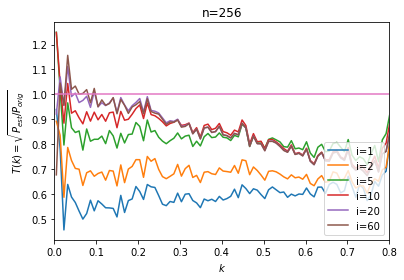

In [37]:
data_actual = np.loadtxt("./build/test2/delta_ps.txt")
transfers = coeffic_series("./build/test2/",data_actual,a=1.44685)
kbins = np.loadtxt("./build/test2/k_bins.txt")

plt.plot(kbins,transfers[0], label="i=1")
plt.plot(kbins,transfers[1], label="i=2")

plt.plot(kbins,transfers[4], label="i=5")
plt.plot(kbins,transfers[9], label="i=10")
#plt.plot(kbins,transfers[14], label="i=15")
plt.plot(kbins,transfers[19], label="i=20")
plt.plot(kbins,transfers[57], label="i=60")

plt.legend(loc=4)


plt.plot([0,2],[1,1])
plt.xlim([0,0.8])

plt.xlabel("$k$")
plt.ylabel("$T(k)=\sqrt{P_{est}/P_{orig}}$")
plt.title("n=256")
#plt.savefig("./1024_transfer.pdf")

174


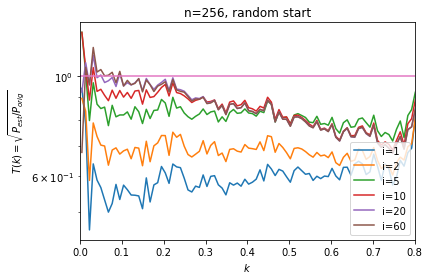

In [46]:
data_actual = np.loadtxt("./build/test6/delta_ps.txt")
transfers = coeffic_series("./build/test6/",data_actual,a=1.44685)
kbins = np.loadtxt("./build/test6/k_bins.txt")

plt.plot(kbins,transfers[0], label="i=1")
plt.plot(kbins,transfers[1], label="i=2")

plt.plot(kbins,transfers[4], label="i=5")
plt.plot(kbins,transfers[9], label="i=10")
#plt.plot(kbins,transfers[14], label="i=15")
plt.plot(kbins,transfers[19], label="i=20")
plt.plot(kbins,transfers[57], label="i=60")


plt.legend(loc=4)


plt.plot([0,2],[1,1])
plt.xlim([0,0.8])
plt.yscale("log")
plt.xlabel("$k$")
plt.ylabel("$T(k)=\sqrt{P_{est}/P_{orig}}$")
plt.title("n=256, random start")
#plt.savefig("./1024_transfer.pdf")

165


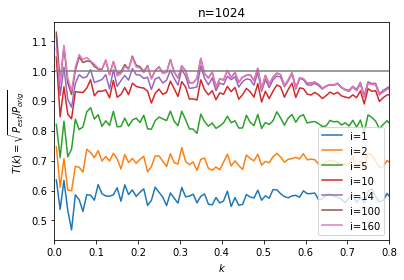

In [36]:
data_actual = np.loadtxt("./build/test_1024/delta_ps.txt")
transfers = coeffic_series("./build/test_1024/",data_actual,a=1.44685)
kbins = np.loadtxt("./build/test_1024/k_bins.txt")

plt.plot(kbins,transfers[0], label="i=1")
plt.plot(kbins,transfers[1], label="i=2")

plt.plot(kbins,transfers[4], label="i=5")
plt.plot(kbins,transfers[9], label="i=10")
#plt.plot(kbins,transfers[14], label="i=15")
plt.plot(kbins,transfers[13], label="i=14")
plt.plot(kbins,transfers[99], label="i=100")

plt.plot(kbins,transfers[159], label="i=160")


plt.legend(loc=4)


plt.plot([0,2],[1,1])
plt.xlim([0,0.8])

plt.xlabel("$k$")
plt.ylabel("$T(k)=\sqrt{P_{est}/P_{orig}}$")
plt.title("n=1024")
#plt.savefig("./1024_transfer.pdf")

182


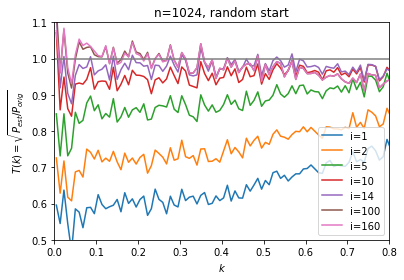

In [52]:
data_actual = np.loadtxt("./build/test7/delta_ps.txt")
transfers = coeffic_series("./build/test7/",data_actual,a=1.44685)
kbins = np.loadtxt("./build/test7/k_bins.txt")

plt.plot(kbins,transfers[0], label="i=1")
plt.plot(kbins,transfers[1], label="i=2")

plt.plot(kbins,transfers[4], label="i=5")
plt.plot(kbins,transfers[9], label="i=10")
#plt.plot(kbins,transfers[14], label="i=15")
plt.plot(kbins,transfers[13], label="i=14")
plt.plot(kbins,transfers[99], label="i=100")

plt.plot(kbins,transfers[159], label="i=160")


plt.legend(loc=4)


plt.plot([0,2],[1,1])
plt.xlim([0,0.8])
plt.ylim([0.5,1.1])


plt.xlabel("$k$")
plt.ylabel("$T(k)=\sqrt{P_{est}/P_{orig}}$")
plt.title("n=1024, random start")
#plt.savefig("./1024_transfer.pdf")

12


/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in sqrt


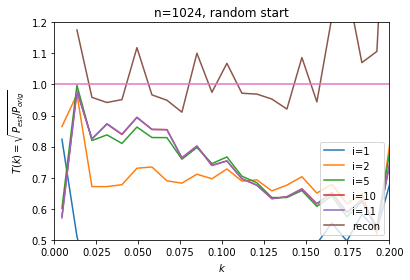

In [103]:
data_actual = np.loadtxt("./build_shear/test/delta_ps.txt")
transfers = coeffic_series("./build_shear/test/",data_actual,a=1.44685)
kbins = np.loadtxt("./build_shear/test/k_bins.txt")
recon = np.loadtxt("./build_shear/test/theta_est_0.txt")

plt.plot(kbins,transfers[0], label="i=1")
plt.plot(kbins,transfers[1], label="i=2")

plt.plot(kbins,transfers[4], label="i=5")
plt.plot(kbins,transfers[9], label="i=10")
plt.plot(kbins,transfers[10], label="i=11")
plt.plot(kbins,np.sqrt(recon/data_actual), label="recon")

#plt.plot(kbins,transfers[14], label="i=15")
#plt.plot(kbins,transfers[13], label="i=14")
#plt.plot(kbins,transfers[99], label="i=100")

#plt.plot(kbins,transfers[159], label="i=160")


plt.legend(loc=4)


plt.plot([0,2],[1,1])
plt.xlim([0,0.2])
plt.ylim([0.5,1.2])


plt.xlabel("$k$")
plt.ylabel("$T(k)=\sqrt{P_{est}/P_{orig}}$")
plt.title("n=1024, random start")
#plt.savefig("./1024_transfer.pdf")

12


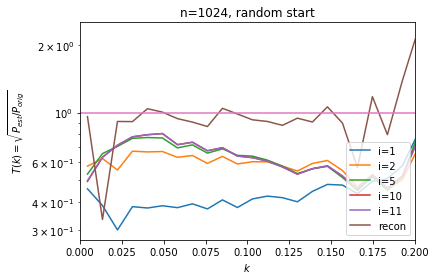

In [104]:
data_actual = np.loadtxt("./build_shear/test/delta_ps.txt")
transfers = coeffic_series("./build_shear/test/clean/",data_actual,a=1.44685)
kbins = np.loadtxt("./build_shear/test/k_bins.txt")
recon = np.loadtxt("./build_shear/test/clean/theta_est_0.txt")

plt.plot(kbins,transfers[0], label="i=1")
plt.plot(kbins,transfers[1], label="i=2")

plt.plot(kbins,transfers[4], label="i=5")
plt.plot(kbins,transfers[9], label="i=10")
plt.plot(kbins,transfers[10], label="i=11")
plt.plot(kbins,np.sqrt(recon/data_actual), label="recon")

#plt.plot(kbins,transfers[14], label="i=15")
#plt.plot(kbins,transfers[13], label="i=14")
#plt.plot(kbins,transfers[99], label="i=100")

#plt.plot(kbins,transfers[159], label="i=160")

plt.semilogy()
plt.legend(loc=4)


plt.plot([0,2],[1,1])
plt.xlim([0,0.2])
#plt.ylim([0.5,1.2])


plt.xlabel("$k$")
plt.ylabel("$T(k)=\sqrt{P_{est}/P_{orig}}$")
plt.title("n=1024, random start")
#plt.savefig("./1024_transfer.pdf")

In [97]:
folder = "./build_shear/test/clean/"
gamma1 = np.fromfile('%sdata_gamma1_noisy.dat' % folder, dtype='f8')
gamma2 = np.fromfile('%scl_data_gamma2_noisy.dat' % folder, dtype='f8')
noise = np.fromfile('%scl_sigmax2.dat' % folder, dtype='f8')

In [98]:
gamma2

array([ 0.04006123,  0.00790938,  0.00954449, ..., -0.01174243,
        0.04776589, -0.00035276])

(<matplotlib.axes._axes.Axes at 0x7fdca8f92890>,
 <matplotlib.image.AxesImage at 0x7fdca8eac390>)

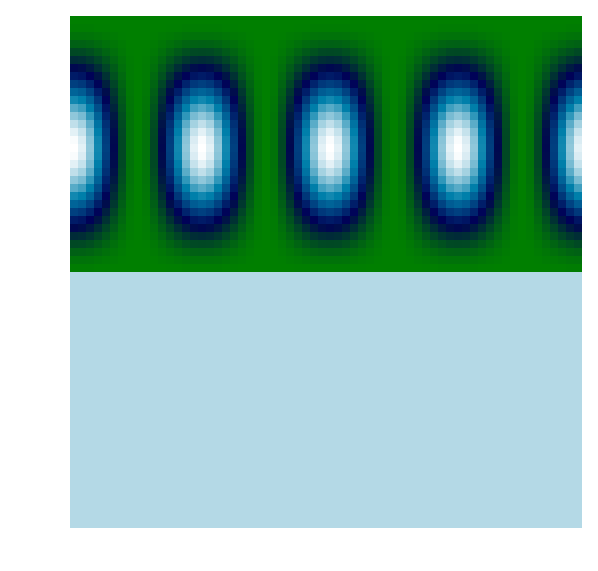

In [101]:
plot_image(noise,colorbar=False,sizebar=False)

(<matplotlib.axes._axes.Axes at 0x7f6a30cfbf90>,
 <matplotlib.image.AxesImage at 0x7f6a30cfc6d0>)

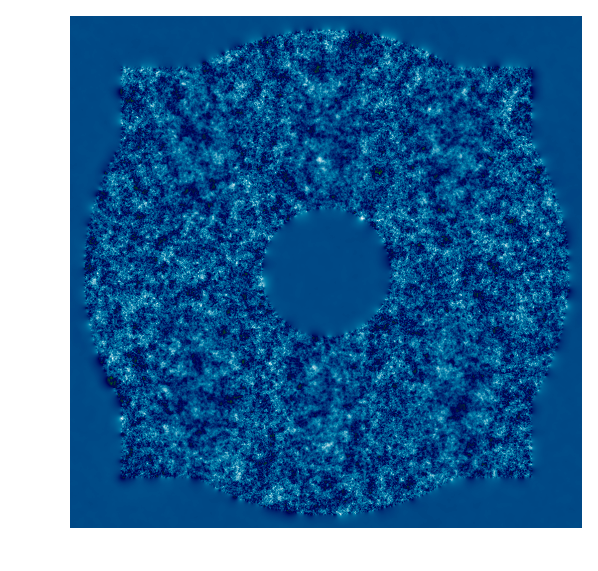

In [371]:
plot_image(a3.delta_x_min,colorbar=False,sizebar=False)

NO LA solution.


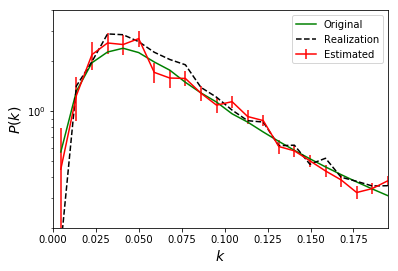

In [401]:
plot_PK(a2,bias=1.0)

/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:49: RuntimeWarning: invalid value encountered in sqrt


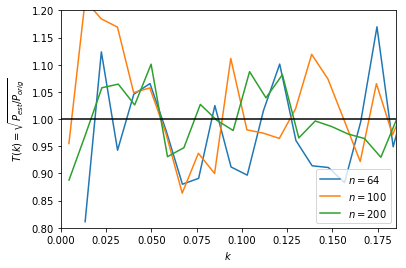

In [429]:
plt.plot(a.k_bins,transfer(a),label="$n=64$")
plt.plot(a1.k_bins,transfer(a1),label="$n=100$")
plt.plot(a2.k_bins,transfer(a2),label="$n=200$")

plt.plot([0,1],[1,1],"black")
plt.xlim([0,.185])
plt.ylim([0.8,1.2])

plt.legend(loc=4)

plt.xlabel("$k$")
plt.ylabel("$T(k)=\sqrt{P_{est}/P_{orig}}$")



/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:49: RuntimeWarning: invalid value encountered in sqrt


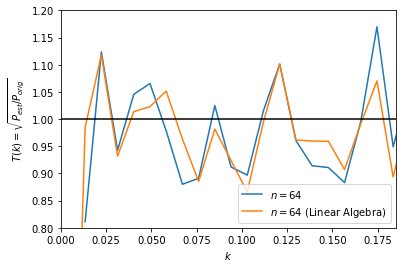

In [430]:
plt.plot(a.k_bins,transfer(a),label="$n=64$")
plt.plot(a.k_bins,transfer(a,lin=True),label="$n=64$ (Linear Algebra)")

plt.plot([0,1],[1,1],"black")
plt.xlim([0,.185])
plt.ylim([0.8,1.2])

plt.legend(loc=4)

plt.xlabel("$k$")
plt.ylabel("$T(k)=\sqrt{P_{est}/P_{orig}}$")



(0.1, 10)

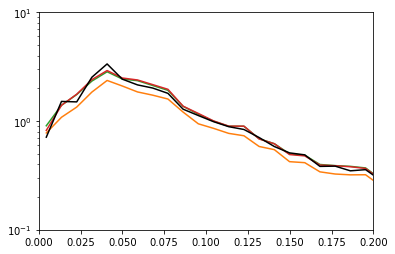

In [510]:
kbin = np.loadtxt("./build5/1024_stand/k_bins.txt")

f0 = np.loadtxt("./build5/1024_stand/lbfgs_ps_0.txt")
f1 = np.loadtxt("./build5/1024_stand/lbfgs_ps_1.txt")
f10 = np.loadtxt("./build5/1024_stand/lbfgs_ps_10.txt")

f100 = np.loadtxt("./build5/1024_stand/lbfgs_ps_100.txt")
f160 = np.loadtxt("./build5/1024_stand/lbfgs_ps_160.txt")

data_actual = np.loadtxt("./build5/1024_stand/delta_ps.txt")

a = 1.44685

plt.plot(kbin,f0)
plt.plot(kbin,f10*a)
plt.plot(kbin,f100*a)
plt.plot(kbin,f160*a)

plt.plot(kbin,data_actual,"black")

plt.semilogy()
plt.xlim([0,0.2])
plt.ylim([0.1,10])

In [528]:
norm = np.dot(data_actual,data_actual)
a = 1.44685
print np.corrcoef(data_actual,f160), np.dot(data_actual,data_actual)/norm

print np.corrcoef(data_actual,f160), np.dot(data_actual,f160*a)/norm

print np.corrcoef(data_actual,f10), np.dot(data_actual,f10*a)/norm

print np.corrcoef(data_actual,f1), np.dot(data_actual,f1*a)/norm

print np.corrcoef(data_actual,f1), np.dot(data_actual,f0*a)/norm

[[ 1.          0.99528403]
 [ 0.99528403  1.        ]] 1.0
[[ 1.          0.99528403]
 [ 0.99528403  1.        ]] 1.0000280913
[[ 1.          0.99413905]
 [ 0.99413905  1.        ]] 0.809650510486
[[ 1.          0.98300581]
 [ 0.98300581  1.        ]] 0.300856724237
[[ 1.          0.98300581]
 [ 0.98300581  1.        ]] 0.0


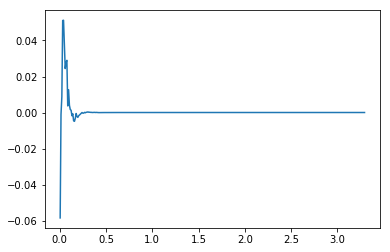

In [482]:
plt.plot(kbin,f160-f100)

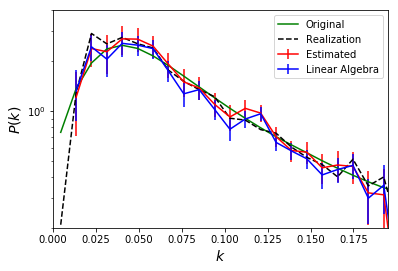

In [408]:
plot_PK(a,bias=1.5)

(<matplotlib.axes._axes.Axes at 0x7f6a2af30c90>,
 <matplotlib.image.AxesImage at 0x7f6a2aecbe50>)

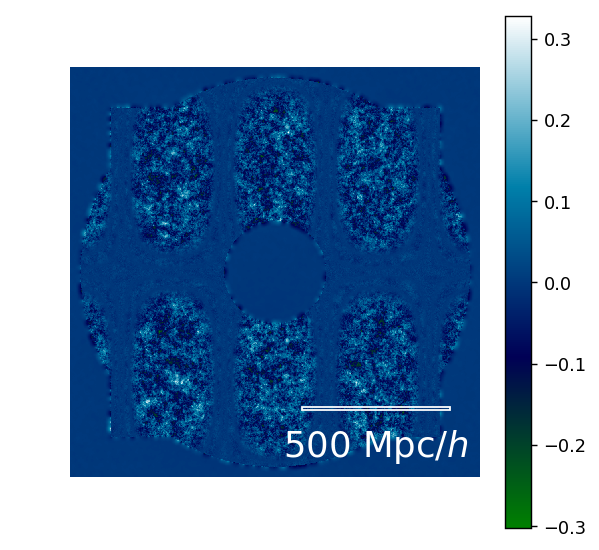

In [444]:
plot_image(np.fromfile("./build4/1024_stand/lbfgs_lin_iter_100.dat", dtype='f8')-np.fromfile("./build4/1024_stand/lbfgs_lin_iter_2.dat", dtype='f8'))

In [38]:

f_ll(a)
#f_ll(c)

NameError: name 'a' is not defined

[]

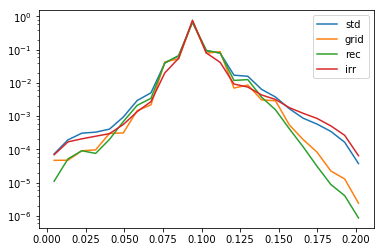

In [204]:
i = 10
plot(a.k_bins,a.window[i,:],label="std")
plot(a.k_bins,b.window[i,:],label="grid")
plot(a.k_bins,c.window[i,:],label="rec")
plot(a.k_bins,d.window[i,:],label="irr")

plt.legend()
plt.semilogy()


In [ ]:
i = 10
plot(a.k_bins,a.window[i,:],label="std")
plot(a.k_bins,b.window[i,:],label="grid")
plot(a.k_bins,c.window[i,:],label="rec")
plot(a.k_bins,d.window[i,:],label="irr")

plt.legend()
plt.semilogy()

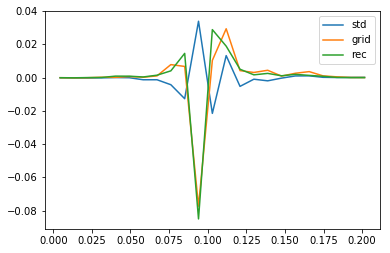

In [134]:
i = 10
plot(a.k_bins,a.window_est[i,:]-a.window[i,:],label="std")
plot(a.k_bins,b.window_est[i,:]-b.window[i,:],label="grid")
plot(a.k_bins,c.window_est[i,:]-c.window[i,:],label="rec")
plt.legend()


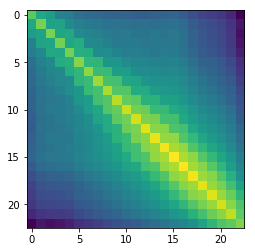

In [123]:
imshow(np.log10(a.fisher))

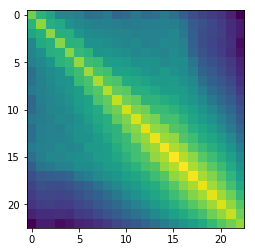

In [122]:
imshow(np.log10(b.fisher))

[]

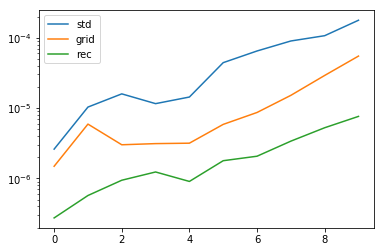

In [86]:
plot(a.window_est[i,:10],label="std")
plot(b.window_est[i,:10],label="grid")
plot(c.window_est[i,:10],label="rec")
plt.legend()
plt.semilogy()

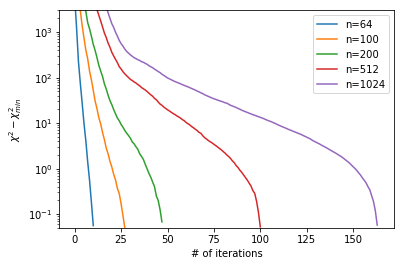

In [329]:
q512 = np.loadtxt("./build4/512_stand/chi2.txt")
q1024 = np.loadtxt("./build4/1024_stand/chi2.txt")


plt.plot(a.chi2[:,0], a.chi2[:,1] - a.chi2[-1,1],label="n=64")
plt.plot(a1.chi2[:,0], a1.chi2[:,1] - a1.chi2[-1,1],label="n=100")
plt.plot(a2.chi2[:,0], a2.chi2[:,1] - a2.chi2[-1,1],label="n=200")
plt.plot(q512[:,0], q512[:,1] - q512[-1,1],label="n=512")
plt.plot(q1024[:,0], q1024[:,1] - q1024[-1,1],label="n=1024")

plt.ylabel("$\chi^2 - \chi^2_{min}$")
plt.xlabel("# of iterations")
plt.ylim([0.05,3000])
plt.semilogy()
plt.legend()

(<matplotlib.axes._axes.Axes at 0x7f6a3202bbd0>,
 <matplotlib.image.AxesImage at 0x7f6a32243450>)

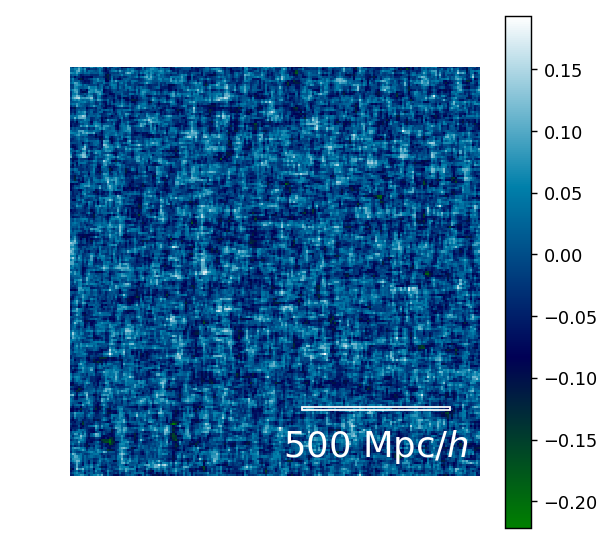

In [321]:
plot_image(a2.gamma1)

(<matplotlib.axes._axes.Axes at 0x7f6a396d2e90>,
 <matplotlib.image.AxesImage at 0x7f6a3a99c310>)

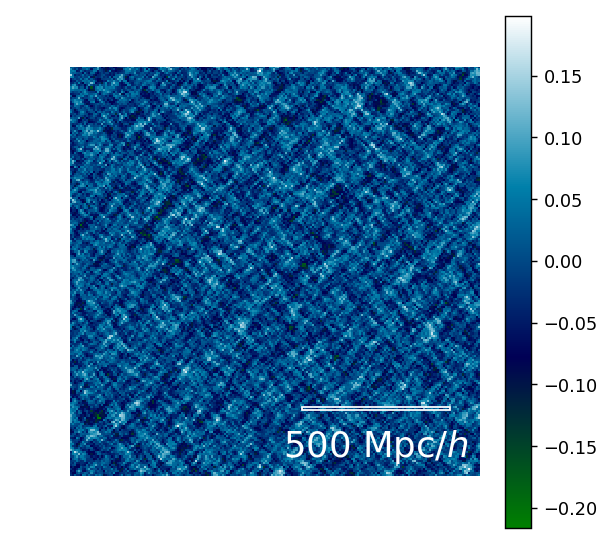

In [256]:
plot_image(a2.gamma2)

In [265]:
a1024 = run("./build4/1024_stand/")

No WF Data!
NO!
No
No fisher
No
No window
No


(<matplotlib.axes._axes.Axes at 0x7f6a335099d0>,
 <matplotlib.image.AxesImage at 0x7f6a33111d10>)

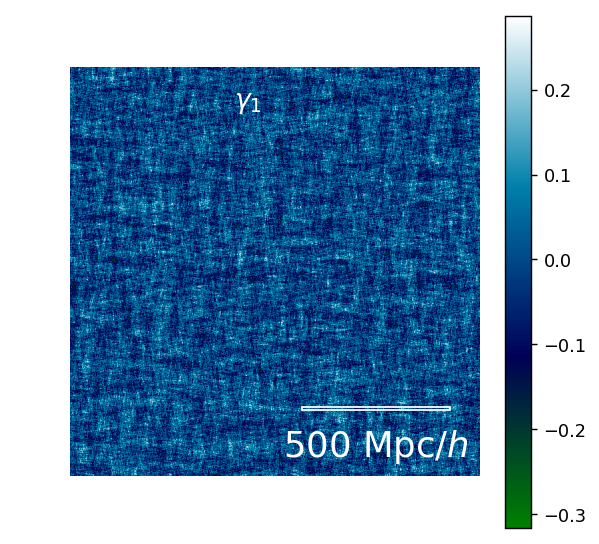

In [268]:
plot_image(a1024.gamma1,text="$\gamma_1$")

(<matplotlib.axes._axes.Axes at 0x7f6a333a3c10>,
 <matplotlib.image.AxesImage at 0x7f6a32e7e3d0>)

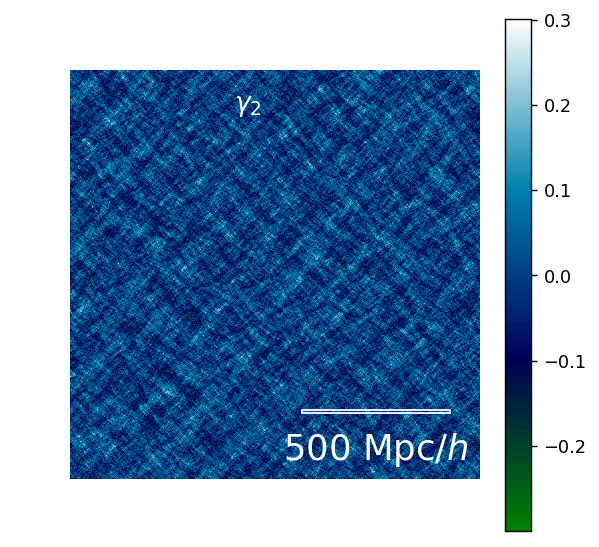

In [270]:
plot_image(a1024.gamma2,text="$\gamma_2$")